In [ ]:
import os
import random
import shutil
import yaml
from sklearn.model_selection import train_test_split
from IPython.display import display, Image as IPyImage
from PIL import Image
from ultralytics import YOLO


In [16]:

src_images_dir = 'widerface_data/images'
src_labels_dir = 'widerface_data/labels'

dest_dir = 'widerface_subset'
dest_images_dir = os.path.join(dest_dir, 'images')
dest_labels_dir = os.path.join(dest_dir, 'labels')

os.makedirs(dest_images_dir, exist_ok=True)
os.makedirs(dest_labels_dir, exist_ok=True)

all_images = os.listdir(src_images_dir)
sample_size = int(0.05 * len(all_images))
sampled_images = random.sample(all_images, sample_size)

for img_name in sampled_images:
    label_name = img_name.replace('.jpg', '.txt')
    shutil.copy(os.path.join(src_images_dir, img_name), dest_images_dir)
    shutil.copy(os.path.join(src_labels_dir, label_name), dest_labels_dir)

print(f'Sampled {sample_size} images and labels copied.')


Sampled 644 images and labels copied.


In [17]:


all_images = os.listdir(dest_images_dir)
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

def write_list_to_file(lst, filepath):
    with open(filepath, 'w') as f:
        for item in lst:
            f.write(f'{os.path.join(dest_images_dir, item)}\n')

write_list_to_file(train_imgs, 'train.txt')
write_list_to_file(val_imgs, 'val.txt')

data_yaml = {
    'train': 'train.txt',
    'val': 'val.txt',
    'nc': 1,  # Number of classes (only face)
    'names': ['face']
}

with open('widerface_data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print('Data yaml file created.')


Data yaml file created.


In [18]:
model = YOLO('yolov8n.pt')
model.train(data='widerface_data.yaml', epochs=10, imgsz=640, batch=16)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 92.7MB/s]


Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=widerface_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

100%|██████████| 755k/755k [00:00<00:00, 25.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1499.8±773.9 MB/s, size: 214.6 KB)


train: Scanning widerface_subset/labels... 515 images, 1 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<00:00, 2285.50it/s]

train: New cache created: widerface_subset/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 453.3±280.1 MB/s, size: 263.3 KB)


val: Scanning widerface_subset/labels... 129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 129/129 [00:00<00:00, 749.92it/s]

val: New cache created: widerface_subset/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.81G      2.499      3.139      1.575         12        640: 100%|██████████| 33/33 [00:13<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.92it/s]

                   all        129       1614     0.0148      0.355     0.0183    0.00943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         5G      2.121      2.207      1.245         95        640: 100%|██████████| 33/33 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]

                   all        129       1614      0.437      0.053     0.0769     0.0396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.81G      2.079      1.994      1.202        279        640: 100%|██████████| 33/33 [00:09<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all        129       1614      0.614      0.202      0.243      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.81G      2.037      1.766      1.197          8        640: 100%|██████████| 33/33 [00:09<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        129       1614      0.159      0.177     0.0864     0.0379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.81G      2.003      1.631      1.185         63        640: 100%|██████████| 33/33 [00:09<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        129       1614      0.629       0.32      0.347       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.81G      1.895      1.518       1.13        366        640: 100%|██████████| 33/33 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        129       1614      0.657      0.324      0.369      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.81G      1.827      1.414       1.12         21        640: 100%|██████████| 33/33 [00:08<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        129       1614      0.649      0.363      0.413      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.81G      1.787      1.327      1.104          7        640: 100%|██████████| 33/33 [00:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.16it/s]

                   all        129       1614      0.721        0.4      0.464      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.81G      1.748      1.278      1.097          3        640: 100%|██████████| 33/33 [00:08<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all        129       1614      0.674      0.436      0.476       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.81G      1.743      1.225      1.087          4        640: 100%|██████████| 33/33 [00:09<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        129       1614      0.684      0.427      0.478      0.226



10 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.35it/s]


                   all        129       1614      0.681      0.426      0.478      0.226
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78bbddc18c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /content/1.png: 384x640 7 faces, 36.4ms
Speed: 1.9ms preprocess, 36.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


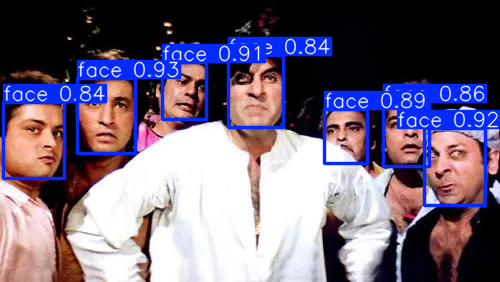

In [21]:
sample_image_path = "/content/1.png"
results = model(sample_image_path)
for r in results:
    im_array = r.plot()
    im = Image.fromarray(im_array[..., ::-1])
    display(im)